In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Netflix.csv to Netflix.csv


In [ ]:
df = pd.read_csv('Netflix.csv')

**INSPECTING DATA**


The dataset provided to you consists of a list of all the TV shows/movies available on Netflix:

Show_id: Unique ID for every Movie / Tv Show

Type: Identifier - A Movie or TV Show

Title: Title of the Movie / Tv Show

Director: Director of the Movie

Cast: Actors involved in the movie/show

Country: Country where the movie/show was produced

Date_added: Date it was added on Netflix

Release_year: Actual Release year of the movie/show

Rating: TV Rating of the movie/show

Duration: Total Duration - in minutes or number of seasons

Listed_in: Genre

Description: The summary description


Hints

The exploration should have a goal. As you explore the data, keep in mind that you want to answer which type of shows to produce and how to grow the business.
Ensure each recommendation is backed by data. The company is looking for data-driven insights, not personal opinions or anecdotes.
Assume that you are presenting your findings to business executives who have only a basic understanding of data science. Avoid unnecessary technical jargon.
Start by exploring a few questions: What type of content is available in different countries?
How has the number of movies released per year changed over the last 20-30 years?
Comparison of tv shows vs. movies.
What is the best time to launch a TV show?
Analysis of actors/directors of different types of shows/movies.
Does Netflix has more focus on TV Shows than movies in recent years
Understanding what content is available in different countries

Evaluation Criteria (100 Points):

1. Defining Problem Statement and Analysing basic metrics (10 Points)

2. Observations on the shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), missing value detection, statistical summary (10 Points)

3. Non-Graphical Analysis: Value counts and unique attributes ​​(10 Points)

4. Visual Analysis - Univariate, Bivariate after pre-processing of the data

Note: Pre-processing involves unnesting of the data in columns like Actor, Director, Country

4.1 For continuous variable(s): Distplot, countplot, histogram for univariate analysis (10 Points)

4.2 For categorical variable(s): Boxplot (10 Points)

4.3 For correlation: Heatmaps, Pairplots (10 Points)

5. Missing Value & Outlier check (Treatment optional) (10 Points)

6. Insights based on Non-Graphical and Visual Analysis (10 Points)

6.1 Comments on the range of attributes

6.2 Comments on the distribution of the variables and relationship between them

6.3 Comments for each univariate and bivariate plot

7. Business Insights (10 Points) - Should include patterns observed in the data along with what you can infer from it

8. Recommendations (10 Points) - Actionable items for business. No technical jargon. No complications. Simple action items that everyone can understand


In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4865 entries, 7 to 8152
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       4865 non-null   object
 1   type          4865 non-null   object
 2   title         4865 non-null   object
 3   director      4865 non-null   object
 4   cast          4865 non-null   object
 5   country       4865 non-null   object
 6   date_added    4865 non-null   object
 7   release_year  4865 non-null   int64 
 8   rating        4865 non-null   object
 9   duration      4865 non-null   object
 10  listed_in     4865 non-null   object
 11  description   4865 non-null   object
dtypes: int64(1), object(11)
memory usage: 494.1+ KB


**CLEANING DATA**

In [ ]:
df.dropna(inplace=True)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...


In [ ]:
df.drop_duplicates(inplace=True)
df.head(15)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


**EXPLORATORY DATA ANALYSIS**


In [ ]:
df.describe()

,release_year
count,8154.000000
mean,2014.503066
std,8.411897
min,1925.000000
25%,2014.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sn

In [ ]:
df['type'].value_counts()

,count
type,
Movie,5597
TV Show,2557


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5332 entries, 7 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       5332 non-null   object
 1   type          5332 non-null   object
 2   title         5332 non-null   object
 3   director      5332 non-null   object
 4   cast          5332 non-null   object
 5   country       5332 non-null   object
 6   date_added    5332 non-null   object
 7   release_year  5332 non-null   int64 
 8   rating        5332 non-null   object
 9   duration      5332 non-null   object
 10  listed_in     5332 non-null   object
 11  description   5332 non-null   object
dtypes: int64(1), object(11)
memory usage: 541.5+ KB


In [ ]:
movies_df =df[df['type']=='Movie']
movies_df['release_year'] = movies_df['release_year'].astype(int)
movies_per_year = movies_df.groupby('release_year').size()

print(movies_per_year)

release_year
1945      1
1946      1
1954      2
1955      2
1956      2
       ... 
2017    579
2018    599
2019    485
2020    409
2021    146
Length: 69, dtype: int64


<ipython-input-12-4280eb4a6e6d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df['release_year'] = movies_df['release_year'].astype(int)


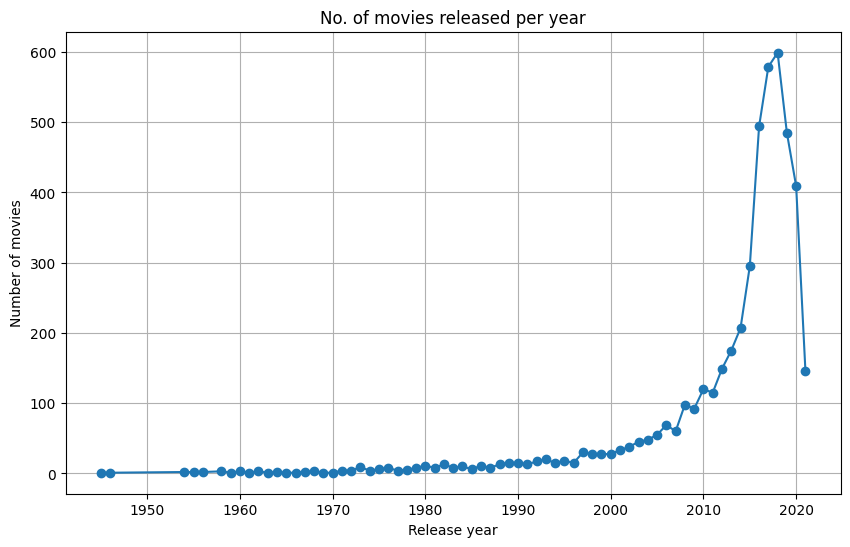

In [ ]:
plt.figure(figsize=(10,6))
movies_per_year.plot(kind='line',marker='o')
plt.title('No. of movies released per year')
plt.xlabel('Release year')
plt.ylabel('Number of movies')
plt.grid(True)
plt.show()

In [ ]:
tv_shows_df = df[df['type']=='TV Show']
tv_shows_per_year = tv_shows_df.groupby('release_year').size()

In [ ]:
comparison_df = pd.DataFrame({
    'Movies':movies_per_year,
    'TV_Show':tv_shows_per_year
})

print(comparison_df)

              Movies  TV_Show
release_year                 
1945               1      NaN
1946               1      NaN
1954               2      NaN
1955               2      NaN
1956               2      NaN
...              ...      ...
2017             579     17.0
2018             599     16.0
2019             485     24.0
2020             409     33.0
2021             146     15.0

[69 rows x 2 columns]


<Figure size 1200x600 with 0 Axes>

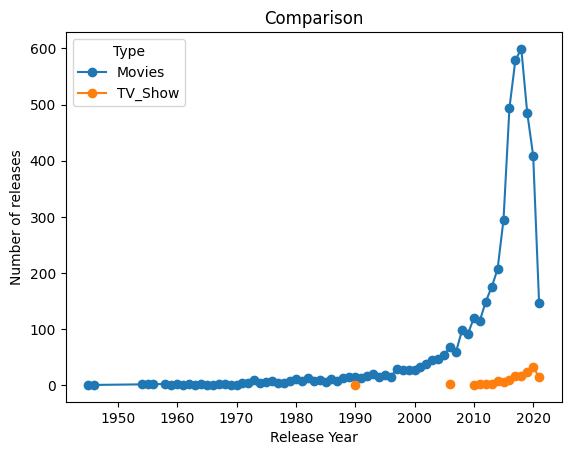

In [ ]:
plt.figure(figsize=(12,6))
comparison_df.plot(kind='line',marker='o')
plt.title('Comparison')
plt.xlabel('Release Year')
plt.ylabel('Number of releases')
plt.legend(title='Type')

3.	What is the best time to launch a TV show?

In [ ]:
tv_shows_df = df[df['type'] == 'TV Show']
tv_shows_df['date_added'] = tv_shows_df['date_added'].fillna(pd.Timestamp('1970-01-01'))

tv_shows_per_month = tv_shows_df.groupby(['date_added']).size().unstack(fill_value=0)
print(tv_shows_per_month)


<ipython-input-36-5d8dbccd96f5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_shows_df['date_added'] = tv_shows_df['date_added'].fillna(pd.Timestamp('1970-01-01'))


ValueError: index must be a MultiIndex to unstack, <class 'pandas.core.indexes.base.Index'> was passed

4.	Analysis of actors/directors of different types of shows/movies.

In [ ]:
def get_top_n_by_genre(df, column, genre, n=5):
    genre_df = df[df['listed_in'].apply(lambda x: genre in x)]
    top_n = genre_df[column].explode().value_counts().head(n)
    return top_n

# Get top 5 actors in Action & Adventure genre
top_actors_action_adventure = get_top_n_by_genre(df, 'cast', 'Action & Adventure', n=5)
print("Top 5 Actors in Action & Adventure Genre:")
print(top_actors_action_adventure)

# Get top 5 directors in Comedies genre
top_directors_comedies = get_top_n_by_genre(df, 'director', 'Comedies', n=5)
print("\nTop 5 Directors in Comedies Genre:")
print(top_directors_comedies)

5.	Does Netflix have more focus on TV Shows than movies in recent years

In [ ]:
content_distribution = recent_years.groupby([recent_years['date_added'].dt.year, 'type']).size().unstack(fill_value=0)
print(content_distribution)

6.	Understanding what content is available in different countries

In [ ]:
country_distribution = df.groupby(['country', 'type']).size().unstack(fill_value=0)
print(country_distribution)